In [1]:
!pip install pyhhmm
!pip install yfinance

  Preparing metadata (setup.py) ... done
  Created wheel for pyhhmm: filename=pyhhmm-2.0.1-py3-none-any.whl size=35476 sha256=3291a009e922227d478314d884802deb9f78d407188314569e47e48dd08f39e3
  Stored in directory: /root/.cache/pip/wheels/ca/69/15/8982f3bd74e20bc98c02fbcaaac319525278ad9295410d5a41
Successfully built pyhhmm


In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf
from pyhhmm.gaussian import GaussianHMM

In [3]:
start_date = "2017-01-1"
end_date = "2022-01-1"
symbol = "THYAO.IS"
data = yf.download(symbol, start=start_date, end=end_date)
data = data[["Open", "High", "Low", "Adj Close", "Volume"]]
data.head(3)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Adj Close,Volume
Date,,,,,
2017-01-02,4.97,5.00,4.95,4.97,24251357
2017-01-03,4.98,4.99,4.88,4.88,55625678
2017-01-04,4.90,4.91,4.82,4.82,30165919


In [4]:
df = data.copy()
df["Returns"] = (df["Adj Close"] / df["Adj Close"].shift(1)) - 1
df["Range"] = (df["High"] / df["Low"]) - 1
df.dropna(inplace=True)
df.head()

,Open,High,Low,Adj Close,Volume,Returns,Range
Date,,,,,,,
2017-01-03,4.98,4.99,4.88,4.88,55625678,-0.018109,0.022541
2017-01-04,4.90,4.91,4.82,4.82,30165919,-0.012295,0.018672
2017-01-05,4.85,4.98,4.79,4.96,85510308,0.029046,0.039666
2017-01-06,4.94,5.00,4.91,4.94,44002092,-0.004032,0.018330
2017-01-09,4.91,4.91,4.85,4.88,38009750,-0.012146,0.012371


In [5]:
X_train = df[["Returns", "Range"]]
X_train.head()

,Returns,Range
Date,,
2017-01-03,-0.018109,0.022541
2017-01-04,-0.012295,0.018672
2017-01-05,0.029046,0.039666
2017-01-06,-0.004032,0.018330
2017-01-09,-0.012146,0.012371


In [6]:
model = GaussianHMM(n_states=3, covariance_type='full', n_emissions=2)
model.train([np.array(X_train.values)])

(<pyhhmm.gaussian.GaussianHMM at 0x7feeb4ec8ee0>, 6703.688366723771)

In [7]:
hidden_states = model.predict([X_train.values])[0]
print(hidden_states[:200])
len(hidden_states)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 1 2 2 2 1 0 1 0 2 2 2 2 2 2 1]


1281

In [8]:
model.means

array([[ 0.04143461,  0.05216102],
       [-0.02062682,  0.05802996],
       [ 0.00155496,  0.0234409 ]])

In [9]:
model.covars

array([[[ 6.36607502e-04,  4.43635368e-04],
        [ 4.43635368e-04,  5.18553784e-04]],

       [[ 1.22644241e-03, -1.58010147e-04],
        [-1.58010147e-04,  8.77470244e-04]],

       [[ 2.43198720e-04,  9.14486750e-06],
        [ 9.14486750e-06,  1.01529464e-04]]])

### Data Visualization

In [10]:
i = 0
labels_0 = []
labels_1 = []
labels_2 = []
prices = df["Adj Close"].values.astype(float)
print("Correct number of rows: ", len(prices) == len(hidden_states))
for s in hidden_states:
    if s == 0:
        labels_0.append(prices[i])
        labels_1.append(float('nan'))
        labels_2.append(float('nan'))
    if s == 1:
        labels_0.append(float('nan'))
        labels_1.append(prices[i])
        labels_2.append(float('nan'))
    if s == 2:
        labels_0.append(float('nan'))
        labels_1.append(float('nan'))
        labels_2.append(prices[i])
    i += 1

Correct number of rows:  True


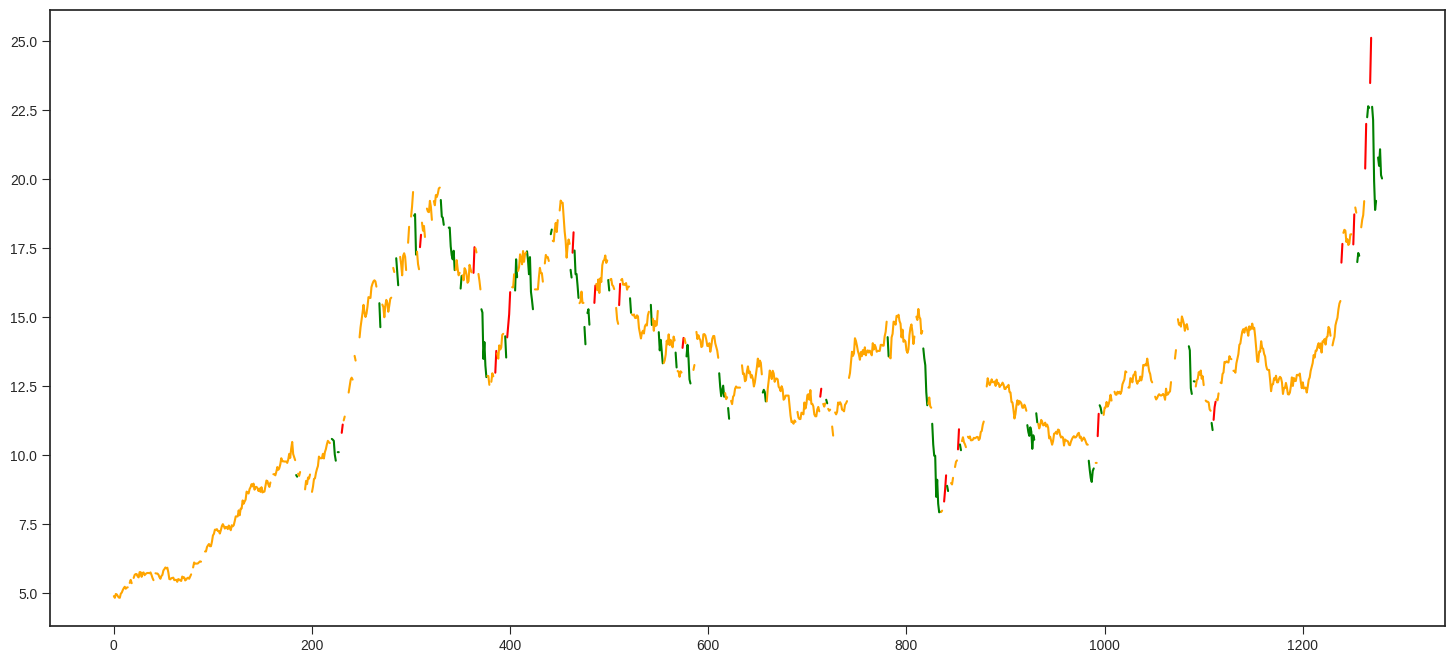

In [11]:
fig = plt.figure(figsize= (18, 8))
plt.plot(labels_0, color="red")
plt.plot(labels_1, color="green")
plt.plot(labels_2, color="orange")
plt.show()